In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [3]:
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('/content/drive/MyDrive/praktikum_ml/praktikum07/data/dataset_satelit.csv')
df.head()

,No,Longitude,Lattitude,N,P,K,Ca,Mg,Fe,Mn,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
0,1,103.036658,-0.604417,2.64,0.15,0.415,0.51,0.31,119.96,463.23,...,0.0433,0.18183,0.04461,35.74446,35.79744,35.41161,0.22331,0.05479,0.31325,0.07686
1,2,103.037201,-0.604689,2.75,0.17,0.568,0.76,0.58,102.63,493.81,...,0.0465,0.22079,0.04640,35.12096,35.14591,35.41510,0.27116,0.05699,0.38033,0.07993
2,3,103.036359,-0.603012,1.77,0.12,0.339,0.49,0.6,107.37,460.93,...,0.0417,0.18926,0.03992,35.07724,35.07730,35.41135,0.23242,0.04902,0.32604,0.06876
3,4,103.036950,-0.603219,2.30,0.15,0.460,0.74,0.67,96.02,338.17,...,0.0367,0.14769,0.03622,36.08078,36.08469,35.41583,0.18138,0.04448,0.25440,0.06238
4,5,103.036802,-0.601969,2.05,0.14,0.308,0.64,0.72,87.01,384.33,...,0.0361,0.18205,0.03797,32.68855,32.69293,35.41592,0.22359,0.04664,0.31359,0.06541


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         594 non-null    int64  
 1   Longitude  594 non-null    float64
 2   Lattitude  594 non-null    float64
 3   N          594 non-null    float64
 4   P          594 non-null    float64
 5   K          593 non-null    float64
 6   Ca         594 non-null    float64
 7   Mg         594 non-null    object 
 8   Fe         594 non-null    float64
 9   Mn         594 non-null    float64
 10  Cu         594 non-null    float64
 11  Zn         594 non-null    float64
 12  B          594 non-null    float64
 13  b12        594 non-null    float64
 14  b11        594 non-null    float64
 15  b9         594 non-null    float64
 16  b8a        594 non-null    float64
 17  b8         594 non-null    float64
 18  b7         594 non-null    float64
 19  b6         594 non-null    float64
 20  b5        

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         594 non-null    int64  
 1   Longitude  594 non-null    float64
 2   Lattitude  594 non-null    float64
 3   N          594 non-null    float64
 4   P          594 non-null    float64
 5   K          593 non-null    float64
 6   Ca         594 non-null    float64
 7   Mg         594 non-null    object 
 8   Fe         594 non-null    float64
 9   Mn         594 non-null    float64
 10  Cu         594 non-null    float64
 11  Zn         594 non-null    float64
 12  B          594 non-null    float64
 13  b12        594 non-null    float64
 14  b11        594 non-null    float64
 15  b9         594 non-null    float64
 16  b8a        594 non-null    float64
 17  b8         594 non-null    float64
 18  b7         594 non-null    float64
 19  b6         594 non-null    float64
 20  b5        

In [6]:
df['P'].unique()

array([0.15, 0.17, 0.12, 0.14, 0.11, 0.16, 0.18, 0.13, 0.2 , 0.1 , 0.19,
       0.21, 0.09, 0.22])

In [9]:
df1 = (df[["P", "b1", "b2", "b3", "b4"]]
         .rename(columns={
             "P": "Pohon",
             "b1": "VIT b1"
         }))

df1.head()

,Pohon,VIT b1,b2,b3,b4
0,0.15,0.0433,0.0337,0.0548,0.0432
1,0.17,0.0465,0.0445,0.0677,0.0626
2,0.12,0.0417,0.0403,0.0622,0.0444
3,0.15,0.0367,0.0373,0.0594,0.0406
4,0.14,0.0361,0.0336,0.0559,0.0364


In [10]:
corr_matrix = df1.corr()
print(corr_matrix)

           Pohon    VIT b1        b2        b3        b4
Pohon   1.000000  0.208038  0.088398 -0.023112 -0.018252
VIT b1  0.208038  1.000000  0.867422  0.639327  0.638188
b2      0.088398  0.867422  1.000000  0.921620  0.909210
b3     -0.023112  0.639327  0.921620  1.000000  0.992621
b4     -0.018252  0.638188  0.909210  0.992621  1.000000


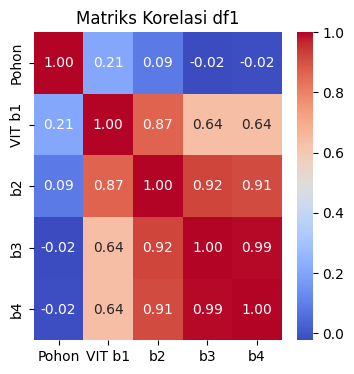

In [14]:
plt.figure(figsize=(4,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi df1")
plt.show()

In [15]:
y = df["P"]
X = df[["b1"]]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Jumlah data train :", len(X_train))
print("Jumlah data test  :", len(X_test))

X_train.head()

Jumlah data train : 475
Jumlah data test  : 119


,b1
155,0.3552
550,0.3091
132,0.0616
450,0.2225
287,0.0576


In [18]:
X_train_const = sm.add_constant(X_train)
X_train_const.head()

,const,b1
155,1.0,0.3552
550,1.0,0.3091
132,1.0,0.0616
450,1.0,0.2225
287,1.0,0.0576


In [19]:
X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const).fit()
print('-----------------------------------------')
print(model.params)
print('-----------------------------------------')

const = model.params['const']
x_p_coef = model.params['b1']

print(f"Persamaan regresi: y = {const:.3f} + ({x_p_coef:.3f})*b1")

-----------------------------------------
const    0.135357
b1       0.029483
dtype: float64
-----------------------------------------
Persamaan regresi: y = 0.135 + (0.029)*b1


In [20]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      P   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     25.66
Date:                Sun, 09 Nov 2025   Prob (F-statistic):           5.85e-07
Time:                        17:38:47   Log-Likelihood:                 1198.0
No. Observations:                 475   AIC:                            -2392.
Df Residuals:                     473   BIC:                            -2384.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1354      0.001    100.262      0.0

In [21]:
X_test_const = sm.add_constant(X_test)
y_pred_test = model.predict(X_test_const)
hasil = pd.DataFrame({
    "b1": X_test["b1"].to_numpy(),
    "Target Aktual": y_test.to_numpy(),
    "Prediksi": y_pred_test
})

hasil["Selisih error"] = hasil["Prediksi"] - hasil["Target Aktual"]

# Catatan: Baris ini memerlukan import numpy
# import numpy as np
denom = hasil["Target Aktual"].replace(0, np.nan)
hasil["Akurasi (%)"] = (1 - (hasil["Selisih error"].abs() / denom).clip(0, 1)) * 100

hasil = hasil.round({
    "b1": 3,
    "Target Aktual": 6,
    "Prediksi": 6,
    "Selisih error": 6,
    "Akurasi (%)": 6
})

hasil.head()

,b1,Target Aktual,Prediksi,Selisih error,Akurasi (%)
30,0.046,0.20,0.136728,-0.063272,68.363752
299,0.070,0.17,0.137423,-0.032577,80.837231
177,0.464,0.14,0.149042,0.009042,93.541145
204,0.479,0.16,0.149491,-0.010509,93.431583
354,0.058,0.16,0.137075,-0.022925,85.672124
